# importação dos dados

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import folium
import streamlit_folium
import streamlit.components.v1 as components
from streamlit_folium import folium_static
from PIL import Image
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('dataset/zomato.csv')

# Limpeza dos dados

In [3]:
def clean_code(df):
    
    filtros = (( df["Restaurant ID"] != "nan") &
               ( df["Restaurant Name"] != "nan") &
               ( df["Country Code"] != "nan") &
               ( df["City"] != "nan") &
               ( df["Address"] != "nan") &
               ( df["Locality"] != "nan") &
               ( df["Locality Verbose"] != "nan") &
               ( df["Longitude"] != "nan") &
               ( df["Latitude"] != "nan") &
               ( df["Cuisines"] != "nan") &
               ( df["Average Cost for two"] != "nan") &
               ( df["Currency"] != "nan") &
               ( df["Has Table booking"] != "nan") &
               ( df["Has Online delivery"] != "nan") &
               ( df["Is delivering now"] != "nan") &
               ( df["Switch to order menu"] != "nan") &
               ( df["Price range"] != "nan") &
               ( df["Aggregate rating"] != "nan") &
               ( df["Rating color"] != "nan") &
               ( df["Rating text"] != "nan") &
               ( df["Votes"] != "nan"))

    df["Cuisines"] = df.loc[:, "Cuisines"].astype(str).apply(lambda x: x.split(",")[0])
    df = df.drop(columns=['Switch to order menu'])
    df = df.drop_duplicates()
    df = df.loc[filtros,:].reset_index(drop=True)
    return df

# Funções

In [4]:


# Renomear as colunas do DataFrame

def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

#Preenchimento do nome dos países

COUNTRIES = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zeland",
    162: "Philippines",
    166: "Qatar",
    184: "Singapure",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "United Arab Emirates",
    215: "England",
    216: "United States of America",
    }
def country_name(country_id):
    return COUNTRIES[country_id]

#Criação do nome das Cores

COLORS = {
    "3F7E00": "darkgreen",
    "5BA829": "green",
    "9ACD32": "lightgreen",
    "CDD614": "orange",
    "FFBA00": "red",
    "CBCBC8": "darkred",
    "FF7800": "darkred",
    }

def color_name(color_code):
    return COLORS[color_code]

#Categorizando restaurantes por um tipo de culinária
df["Cuisines"] = df.loc[:, "Cuisines"].astype(str).apply(lambda x: x.split(",")[0])




In [5]:

def max_min_avaliation(df, cuisines, condition):
    if condition  == True:
        filtro = (df['Cuisines'] == cuisines) & (df['Votes'] > 0)
        colunas = ['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Votes']
        df1 = df.loc[filtro, colunas].reset_index(drop=True)
        df1 = df1.loc[(df1['Aggregate rating'] == df1['Aggregate rating'].max()), colunas].reset_index(drop=True)
        return df1
    elif condition == False:
        filtro = (df['Cuisines'] == cuisines) & (df['Votes'] > 0)
        colunas = ['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Votes']
        df1 = df.loc[filtro, colunas].reset_index(drop=True)
        df1 = df1.loc[(df1['Aggregate rating'] == df1['Aggregate rating'].min()), colunas].reset_index(drop=True)
        return df1


In [21]:
df1 = clean_code(df)

# Respondendo as perguntas de negócio

### Geral

In [63]:
#1. Quantos restaurantes únicos estão registrados?

rest_unique_qt = df['Restaurant ID'].nunique()

print(f'Temos {rest_unique_qt} restaurantes únicos')


Temos 6942 restaurantes únicos


In [66]:
#2. Quantos países únicos estão registrados?
country_unique_qt = df['Country Code'].nunique()

country_unique_qt

15

In [68]:
#3. Quantas cidades únicas estão registradas?

city_unique_qt = df['City'].nunique()

city_unique_qt

125

In [69]:
#4. Qual o total de avaliações feitas?
total_votes = df['Votes'].sum()

total_votes


4639654

In [157]:
#5. Qual o total de tipos de culinária registrados?

Cuisines_types = df['Cuisines'].nunique()

Cuisines_types 

166

In [158]:
#6. Quais os tipos de culinária registrados?

Cuisines_types = df['Cuisines'].unique()

Cuisines_types 

array(['Italian', 'European', 'Filipino', 'American', 'Korean', 'Pizza',
       'Taiwanese', 'Japanese', 'Coffee', 'Chinese', 'Seafood',
       'Singaporean', 'Vietnamese', 'Latin American', 'Healthy Food',
       'Cafe', 'Fast Food', 'Brazilian', 'Argentine', 'Arabian', 'Bakery',
       'Tex-Mex', 'Bar Food', 'International', 'French', 'Steak',
       'German', 'Sushi', 'Grill', 'Peruvian', 'North Eastern',
       'Ice Cream', 'Burger', 'Mexican', 'Vegetarian', 'Contemporary',
       'Desserts', 'Juices', 'Beverages', 'Spanish', 'Thai', 'Indian',
       'Mineira', 'BBQ', 'Mongolian', 'Portuguese', 'Greek', 'Asian',
       'Author', 'Gourmet Fast Food', 'Lebanese', 'Modern Australian',
       'African', 'Coffee and Tea', 'Australian', 'Middle Eastern',
       'Malaysian', 'Tapas', 'New American', 'Pub Food', 'Southern',
       'Diner', 'Donuts', 'Southwestern', 'Sandwich', 'Irish',
       'Mediterranean', 'Cafe Food', 'Korean BBQ', 'Fusion', 'Canadian',
       'Breakfast', 'Cajun', 'Ne

### País

In [61]:
#1. Qual o nome do país que possui mais cidades registradas?
colunas = ['City', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()

c_code = df1.sort_values('City', ascending = False).iloc[0,0]

c_name = country_name(c_code)

print(c_name)

India


In [72]:
#2. Qual o nome do país que possui mais restaurantes registrados?

#Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

#Será entregue o nome do País que possui mais restaurantes registrados

#Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

# Agrupar a quantidade de restaurantes por código de país, classificar em ordem decrescente, pegar o código do país e extrair o nome do país através do código

#Passo 3: Entrada: Elaboração do código

colunas = ['Restaurant ID', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()

c_code = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

c_name=country_name(c_code)

print(f'Com um total de {c_qtd} restaurantes o país que possui mais restaurantes registrados é {c_name}')


Com um total de 3120 restaurantes o país que possui mais restaurantes registrados é India


In [51]:
""" 1. 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue nome do país que possui mais restaurantes com nível de preço igual a 4 registrados

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar somente restaurantes com nível de preço igual a 4
- Agrupar o número de restaurantes únicos registrados por país
- Ordenar em ordem decrescente o código dos países pela quantidade de restaurantes únicos
- Pegar o código do país com mais restaurantes registrados
- Obter o nome do país através do código do país

#Passo 3: Entrada: Elaboração do código

"""
df1 = df.loc[(df['Price range'] == 4), :]

colunas = ['Restaurant ID', 'Country Code']

df1 = df1.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()

c_code = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]

c_name = country_name(c_code)

print(f'O nome do país com maior número de restaurantes com nível de preço igual a 4 é {c_name}')

O nome do país com maior número de restaurantes com nível de preço igual a 4 é United States of America


In [54]:
""" 1. 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país que possui maior quantidade de tipos de culinárias distintos

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a quantidade de tipos de culinária distintos por país
- Classificar em ordem decrescente a o código do país pela quantidade de cuninárias distintos
- Obter o código do país com maior quantidade de culinárias distintas e obter o nome de país a partir disso

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Cuisines', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()

c_code = df1.sort_values('Cuisines', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Cuisines', ascending = False).iloc[0,1]

c_name = country_name(c_code)

print(f'Com um total de {c_qtd} culinárias {c_name} é o país que possui maior quantidade de culinárias distintas')

Com um total de 78 culinárias India é o país que possui maior quantidade de culinárias distintas


In [63]:
"""  5. Qual o nome do país que possui a maior quantidade de avaliações feitas?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país que possui o maior número de avaliações feitas

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a soma de avaliações por código de país
- Classificar em ordem decrescente o código do país pela coluna de soma de avaliações
- Obter o código do país com maior número de avaliações
- Obter o nome do país com o maior número da avaliaçõe a partir do código do país

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Votes', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).sum().reset_index()

c_code = df1.sort_values('Votes', ascending = False).iloc[0,0]
c_votes = df1.sort_values('Votes', ascending = False).iloc[0,1]

c_name = country_name(c_code)

print(f'Com um total de {c_votes} avaliações, {c_name} é o país com maior número de avaliações')

Com um total de 2800199 avaliações, India é o país com maior número de avaliações


In [143]:
""" 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país que possui o maior número de restaurantes que fazem delivery

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar somente os restaurantes que possuem delivery
- Agrupar a quantidade de restaurantes por código de país
- Ordenar em ordem decrescente o código de país pela quantidade de restaurante
- Obter o número do código do país
- Obter o nome do país através do código do país

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Is delivering now'] == 1), : ]

colunas = ['Restaurant ID', 'Country Code']

df1 = df1.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()

c_code = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

c_name = country_name(c_code)

print(f' Com um total de {c_qtd} restaurantes, {c_name} é o país com o maior número de restaurantes com deliveri disponível')

 Com um total de 1150 restaurantes, India é o país com o maior número de restaurantes com deliveri disponível


In [81]:
""" 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país que possui a meior quantidade de restaurantes que aceitam reservas

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar apenas por restaurantes que possuem a opção de reserva positiva
- Agrupar a quantidade de restaurantes por país
- Ordenar a coluna de código de país pela quantidade de retaurantes
- Obter o código do país
- Obter o nome do país através do código do país

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Has Table booking'] == 1), :]

colunas = ['Restaurant ID', 'Country Code']

df1 = df1.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()

c_code = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

c_name = country_name(c_code)

print(f'Com um total de {c_qtd} restaurantes, {c_name} é o país com o maior número de restaurantes com possibilidade de reserva')

Com um total de 256 restaurantes, India é o país com o maior número de restaurantes com possibilidade de reserva


In [101]:
""" 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país que possui, em média, a maior quantidade de avaliações registradas.

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a média de avaliações registradas por país
- Ordenar do maior para o menor a média
- Obter o código do país com a maior média
- Obter o nome do país através do código do país

#Passo 3: Entrada: Elaboração do código
"""

#definindo as colunas necessárias
colunas = ['Votes', 'Country Code']
#obtendo a média da quantidade de valiações por país
df1 = df.loc[:, colunas].groupby(['Country Code']).mean().reset_index()
#obtendo a quantidade de avaliações por país
df2 = df.loc[:, colunas].groupby(['Country Code']).sum().reset_index()

#obtendo o código do país com a maior média de avaliações
c_code = df1.sort_values('Votes', ascending = False).iloc[0,0]
#obtendo a maior média
c_mean = df1.sort_values('Votes', ascending = False).iloc[0,1]
#obtendo o nome do país com a maior média de avaliações
c_name = country_name(c_code)
#obtendo a quantidade de avaliações do país com a maior média de avaliações
c_qtd = df2.loc[(df2['Country Code'] == c_code), 'Votes'].reset_index()
c_qtd = c_qtd.iloc[0,1]
print('Com uma média de {:.2f}, tendo {} avaliações, {} é o país com a maior média de avaliações registradas'.format(c_mean, c_qtd, c_name))


Com uma média de 1112.83, tendo 89026 avaliações, Indonesia é o país com a maior média de avaliações registradas


In [106]:
""" 9. Qual o nome do país que possui, na média, a maior nota média registrada?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país com a maior nota média registrada

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a média das notas das avaliações por países
- Ordenar em ordem decrescente o código do país pela média da nota das avaliações
- Obter o código do país com a maior média
- Obter o nome de país a partir do código
- Obter a média e a quantidade de avaliações do país

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Aggregate rating', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).mean().reset_index()

c_code = df1.sort_values('Aggregate rating', ascending = False).iloc[0,0]
c_mean = df1.sort_values('Aggregate rating', ascending = False).iloc[0,1]

colunas_aux = ['Votes', 'Country Code']

df2 = df.loc[:, colunas_aux].groupby('Country Code').sum().reset_index()
c_ratings = df2.loc[(df2['Country Code'] == c_code), 'Votes'].reset_index()
c_ratings = c_ratings.iloc[0,1]

print('Com uma média de {:.2f}, e {} avaliações, {} é o país com a maior média de avaliações registradas'.format(c_mean, c_ratings, c_name))



Com uma média de 4.60, e 89026 avaliações, Indonesia é o país com a maior média de avaliações registradas


In [108]:
""" 10. Qual o nome do país que possui, na média, a menor nota média registrada?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do país com a menor média registrada

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar as médias das avaliações por código de país
- Ordenar os códigos de países por avaliação média em ordem crescente
- Obter o código do país com a menor média de avaliação
- Obter o nome do país com menor média de avaliação a partir do código do país
- Obter a quantidade de avaliações e a média do país com a menor média de avaliações

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Aggregate rating', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).mean().reset_index()

c_code = df1.sort_values('Aggregate rating', ascending = True).iloc[0,0]
c_mean = df1.sort_values('Aggregate rating', ascending = True).iloc[0,1]

colunas_aux = ['Votes', 'Country Code']

df2 = df.loc[:, colunas_aux].groupby(['Country Code']).sum().reset_index()
df2 = df2.loc[(df2['Country Code'] == c_code), 'Votes'].reset_index()
c_votes = df2.iloc[0,1]

print('Com uma média de {:.2f}, tendo {} votos, {} é o país com a menor média de avaliações registradas'.format(c_mean, c_votes, c_name))

Com uma média de 3.32, tendo 2977 votos, Indonesia é o país com a menor média de avaliações registradas


In [121]:
""" 11. Qual a média de preço de um prato para dois por país?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue um dataframe contendo a média de valor de um prato para duas pessoas por país

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar as médias de valores de pratos para duas pessoas por país

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Average Cost for two', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).mean().reset_index()

df1['Country_name'] = df1['Country Code'].apply(country_name)

df1

,Country Code,Average Cost for two,Country_name
0,1,703.602564,India
1,14,138959.783333,Australia
2,30,138.812500,Brazil
3,37,41.861111,Canada
4,94,303000.000000,Indonesia
5,148,62.154812,New Zeland
6,162,1227.825000,Philippines
7,166,174.000000,Qatar
8,184,141.437500,Singapure
9,189,339.228324,South Africa


### Cidade

In [122]:
""" 1. Qual o nome da cidade que possui mais restaurantes registrados?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade que possui o maior número de restaurantes registrados

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a quantidade de restaurantes por cidade
- Ordenar em ordem decrescente as cidades de acordo com a quantidade de restaurantes registrados
- Obter o nome da cidade com o maior número de restaurantes registrados
- Obter o número de restaurantes registrados nesta cidade

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Restaurant ID', 'City']

df1 = df.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} restaurantes, {c_name} é a cidade com o maior número de restaurantes registrados')

Com um total de 80 restaurantes, Abu Dhabi é a cidade com o maior número de restaurantes registrados


In [124]:
""" 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade com o maior número de restaurantes com média acima de 4

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por apenas restaurantes com média acima de 4.0
- Agrupar a quantidade de restaurantes por cidade
- Ordenar de forma decrescente as cidades pela quantidade de restaurantes registrados
- Obter o nome da cidade com o maior número de restaurantes registrados com nota superior a 4
- Obter o número de restaurantes registrados nesta cidade

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Aggregate rating'] > 4), :]

colunas = ['Restaurant ID', 'City']

df1 = df1.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} restaurantes, {c_name} é a cidade com o maior número de restaurantes com nota superior a 4.0')



Com um total de 79 restaurantes, Bangalore é a cidade com o maior número de restaurantes com nota superior a 4.0


In [125]:
""" 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade que possuí a maior quantidade de restaurantes com média de avalidações inferior a 2.5

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar dataframe por somente restaurantes que possuem nota inferiror a 2.5
- Agrupar a quantidade de restaurantes por cidade
- Ordenar de forma decrescente o nome das cidades por quantidade de resdtaurantes
- Obter o nome da cidade com mais restaurantes com notas inferiores a 2.5
- Obter a quantidade de restaurates com notas iferiores a 2.5 nesta cidade

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Aggregate rating'] < 2.5), :].reset_index()

colunas = ['Restaurant ID', 'City']

df1 = df1.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} restaurantes, {c_name} é a cidade com o maior número de restaurantes com média menor que 2.5')

Com um total de 40 restaurantes, Gangtok é a cidade com o maior número de restaurantes com média menor que 2.5


In [130]:
""" 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade que possui o maior valor médio de um prato para dois

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a média de valor de pratos para duas pessoas por cidade
- Ordenar de forma decrescente o nome das cidades pela média de valor de pratos para duas pessoas
- Obter o nome da cidade com o maior valor médio de preço de prato para duas pessoas
- Obter o valor médio de prato para duas pessoas desta cidade

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Average Cost for two', 'City']

df1 = df.loc[:, colunas].groupby(['City']).mean().reset_index()

c_name = df1.sort_values('Average Cost for two', ascending = False).iloc[0,0]
c_cost = df1.sort_values('Average Cost for two', ascending = False).iloc[0,1]

print('Com o valor médio de {:.2f}, {} é a cidade com o maior valor de custo médio para duas pessoas'.format(c_cost, c_name))

Com o valor médio de 416734.13, Adelaide é a cidade com o maior valor de custo médio para duas pessoas


In [138]:
""" 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade que possui o maior número de tipos de culinária

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar as quantidades únicas de tipos de culinárias por cidade
- Ordenar de forma decrescente por quantidade de culinária
- Obter o nome da cidade que possui o maior número de culinárias distintas

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Cuisines', 'City']

df1 = df.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Cuisines', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Cuisines', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} culinárias, {c_name} é a cidade com o maior número de culinárias distintas')


Com um total de 32 culinárias, Birmingham é a cidade com o maior número de culinárias distintas


In [140]:
""" 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade que possui maior quantidade de restaurantes com reserva disponível

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por restaurantes com reserva disponível
- Agrupar a contagem única de restaurantes por cidade
- Ordenar de forma decrescente os nomes das cidades de acordo com a quantidade de restaurantes
- Obter o nome da cidade com maior número de restaurantes com reserva disponível
- Obter o número de restaurantes com reserva disponível nesta cidade

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Has Table booking'] == 1), :]

colunas = ['Restaurant ID', 'City']

df1 = df1.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} restaurantes, {c_name} é a cidade com o maior número de restaurantes com reserva disponível')

Com um total de 42 restaurantes, Bangalore é a cidade com o maior número de restaurantes com reserva disponível


In [142]:
""" 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade com o maior número de restaurantes que fazem entrega

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por restaurantes que possuem delivery
- Agrupar o número de restaurantes por cidade
- Ordenar de forma decrescente as cidades, por quantidade de restaurantes
- Obter o nome da cidade com o maior número de restaurantes que fazem entrega
- Obter a quantidade de restaurantes desta cidade que faz entrega

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Is delivering now'] == 1), :]

colunas = ['Restaurant ID', 'City']

df1 = df1.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} restaurantes, {c_name} é a cidade com o maior número de restaurantes que fazem entregas')

Com um total de 48 restaurantes, Vadodara é a cidade com o maior número de restaurantes que fazem entregas


In [144]:
""" 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por apenas restaurantes que aceitam pedidos online 
- Agrupar a quantidade única de restaurantes por cidade
- Ordenar de forma decrescente o nome das cidades de acordo com a quantidade de restaurantes
- Obter o nome da cidade com o maior número de restaurantes que possuem delivery online
- Obter a quantidade de retaurantes que possuem delivery online desta cidade

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Has Online delivery'] == 1), :]

colunas = ['Restaurant ID', 'City']

df1 = df1.loc[:, colunas].groupby(['City']).nunique().reset_index()

c_name = df1.sort_values('Restaurant ID', ascending = False).iloc[0,0]
c_qtd = df1.sort_values('Restaurant ID', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd} restaurantes, {c_name} é a cidade com o maior número de reaturantes com delivery online disponível')

Com um total de 75 restaurantes, Bhopal é a cidade com o maior número de reaturantes com delivery online disponível


### Restaurantes

In [148]:
""" 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do restaurante com a maior quantidade de avaliações

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a quantidade de avaliações por nome de restaurante
- Ordernar os nomes de restaurantes por quantidade de avaliação
- Obter o nome do restaurante com o maior número de avaliações
- Obter o número de avaliações deste retaurante

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Votes', 'Restaurant Name']

df1 = df.loc[:, colunas].groupby(['Restaurant Name']).sum().reset_index()

r_name = df1.sort_values('Votes', ascending = False).iloc[0,0]
r_votes = df1.sort_values('Votes', ascending = False).iloc[0,1]

print(f'Com um total de {r_votes} avaliações, {r_name} é o restaurante com o maior número de avaliações registradas')

Com um total de 59749 avaliações, Domino's Pizza é o restaurante com o maior número de avaliações registradas


In [152]:
""" 2. Qual o nome do restaurante com a maior nota média?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do restaurante com a maior nota média

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Encontrar a maior nota média
- Filtrar os restaurantes que possuem a maior nota média
- Ordenar pelo restaurante com o menor ID
- Obter o nome do restaurante
- Exibir a maior média

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Aggregate rating'] == df['Aggregate rating'].max()), ['Restaurant ID', 'Restaurant Name', 'Aggregate rating']].reset_index(drop=True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,1]
r_rating = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]

print(f'Com uma média de {r_rating}, o restaurante {r_name} é o que possui a maior nota média')

Com uma média de 4.9, o restaurante Indian Grill Room é o que possui a maior nota média


In [154]:
""" 3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do restaurante que possui o maior valor para um prato para duas pessoas

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Encontrar o maior valor de um prato para duas pessoas
- Filtrar por restaurantes que possuem este valor para os pratos para duas pessoas
- Ordenar de forma crescente por id de restaurante
- Obter o nome do restaurante
- Exibir o valor do prato para duas pessoas

#Passo 3: Entrada: Elaboração do código
"""

df1 = df.loc[(df['Average Cost for two'] == df['Average Cost for two'].max()), ['Restaurant ID', 'Restaurant Name', 'Average Cost for two']]

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,1]
r_cost = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]

print(f'Com um custo de ${r_cost}, {r_name} é o restaurante com o maior custo para um prato que serve duas pessoas')

Com um custo de $25000017, d'Arry's Verandah Restaurant é o restaurante com o maior custo para um prato que serve duas pessoas


In [165]:
""" 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do restaurante de culinária brasileira que possui a menor média de avaliação

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar restaurantes com culinária brasileira
- Descobrir a menor média
- Filtrar restaurantes com a menor média
- Ordenar de forma crescente, restaurantes por id de restaurante
- Obter o nome do restaurante
-Exibir a nota do restaurante

#Passo 3: Entrada: Elaboração do código
"""
#filtrando por culinária brasileira
df1 = df.loc[(df['Cuisines'] == 'Brazilian'), :]
#filtrando por nota mais baixa e por restaurantes que possuem avaliações
df1 = df1.loc[(df1['Aggregate rating'] == df1['Aggregate rating'].min()) & (df1['Votes'] > 0), ['Restaurant ID', 'Restaurant Name', 'Aggregate rating', 'Votes']]
# ordenando por id e obtendo o nome do restaurante
r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,1]
# ordenando por id e obtendo a média de avaliação do restaurante
r_rating = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
# ordenando por id e obtendo a quantidade de avaliações registradas
r_votes = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_votes} avaliações, e uma média de {r_rating}, {r_name} é o restaurante de culinária brasileira que possui a menor média de avaliações registradas')

Com um total de 3 avaliações, e uma média de 0.0, Loca Como tu Madre é o restaurante de culinária brasileira que possui a menor média de avaliações registradas


In [169]:
""" 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar os restaurantes do Brasil
- Filtrar os restaurantes com culinária brasileira
- Filtrar os restaurantes com a maior média de avaliações
- Ordenar de forma crescente a partir do id do restaurante
- Obter o nome do restaurante
- Exibir a nota do restaurante
- Exibir a quantidade de avaliações do restaurante

#Passo 3: Entrada: Elaboração do código
"""

filtros = (df['Country Code'] == 30) & (df['Cuisines'] == 'Brazilian') & (df['Aggregate rating'] == df['Aggregate rating'].max()) & (df['Votes'] > 0)
colunas = ['Restaurant ID', 'Restaurant Name', 'Aggregate rating', 'Votes']

df1 = df.loc[ filtros, colunas].reset_index(drop=True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,1]
r_rating = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_votes = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_votes} avaliações, uma média de {r_rating}, {r_name} é o restaurante brasileiro, de culinária brasileira com a maior média de avaliações registradas')


Com um total de 47 avaliações, uma média de 4.9, Braseiro da Gávea é o restaurante brasileiro, de culinária brasileira com a maior média de avaliações registradas


In [6]:
""" 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue a comparação da média de avaliação registradas de restaurantes que possuem e que não possuem a opção de pedidos online

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a média da quantidade de avaliações dos restaurantes que aceitam e que não aceitam pedidos online
- Comparar e responder a pergunta

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Votes', 'Has Online delivery']

df1 = df.loc[:, colunas].groupby(['Has Online delivery']).mean().reset_index()


,Has Online delivery,Votes
0,0,478.284227
1,1,838.821664


In [8]:
""" 7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?



Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue um dataframe com duas linhas e duas colunas, onde será comparado a média dos restaurantes que fazem reservas e seus valores médios para pratos para duas pessoas

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a média do valor de pratos para duas pessoas por possibilidade de reserva
- entregar o dataframe
-

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Average Cost for two', 'Has Table booking']

df1 = df.loc[:, colunas].groupby(['Has Table booking']).mean().reset_index()

df1

,Has Table booking,Average Cost for two
0,0,3482.264949
1,1,69998.423810


In [23]:
""" 8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue um dataframe com a comparação do valor média dos restaurantes que atendem os requisitos da questão

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Criar um filtro para EUA
- Criar um filtro para restaurantes de culinária japonesa e churrascarias dos EUA
-Definir colunas necessárias
- Realizar a média de valor de prato para duas pessoas para restaurantes de culinária japonesa e para churrascarias
- Exibir dataframe

#Passo 3: Entrada: Elaboração do código
"""


filtros_country = (df['Country Code'] == 216)
df1 = df.loc[filtros_country, :]

filtros_cuisines = (df1['Cuisines'] == 'Japanese') | (df1['Cuisines'] == 'BBQ')
colunas = ['Average Cost for two', 'Cuisines', 'Country Code']

df1 = df1.loc[filtros_cuisines, colunas ].groupby(['Country Code', 'Cuisines']).mean().reset_index()

df1


,Country Code,Cuisines,Average Cost for two
0,216,BBQ,39.642857
1,216,Japanese,56.406250


### Tipos de culinária

In [97]:
""" 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

-Será entregue o nome do restaurante de tipo de culinária italiana que possui a maior média de avaliação

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por tipo de culinária italiana e por restaurantes com número de avaliações registradas maior que 0
- Agrupar a média das notas das avaliações por nome de restaurante
- Exibir o nome do restaurante, a sua média e a quantidade de avaliações registradas

#Passo 3: Entrada: Elaboração do código
"""

df1 = max_min_avaliation(df, cuisines = 'Italian', condition = True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária italiana com a maior média de avaliação')

Com um total de 3106 avaliações, uma média de 4.9, Darshan é o restaurante de culinária italiana com a maior média de avaliação


In [98]:
""" 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?



Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do restaurante de culinária italiana com a menor média de avaliação

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por tipo de culinária italiana, por restaurantes com média de avaliações registradas maior que 0 por nota máxima de avaliação
- Definir colunas para o novo dataframe
- Ordenar por ID de restaurante de forma crescente
- Exibir o nome do restaurante, a média de avaliação e a quantidade de avaliações registradas

#Passo 3: Entrada: Elaboração do código
"""

df1 = max_min_avaliation(df, cuisines = 'Italian', condition = False)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária italiana com a menor média de avaliação')



Com um total de 2 avaliações, uma média de 0.0, Ristorantino é o restaurante de culinária italiana com a menor média de avaliação


In [99]:
""" 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'American', condition = True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária americana com a maior média de avaliação')

Com um total de 453 avaliações, uma média de 4.9, Burger & Lobster é o restaurante de culinária americana com a maior média de avaliação


In [102]:
""" 4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?
"""
df1 = max_min_avaliation(df, cuisines = 'American', condition = False)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária Americana com a menor média de avaliação')

Com um total de 183 avaliações, uma média de 2.2, Guy Fieri's Kitchen & Bar é o restaurante de culinária Americana com a menor média de avaliação


In [103]:
""" 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'Arabian', condition = True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária Árabe com a maior média de avaliação')

Com um total de 1085 avaliações, uma média de 4.7, Mandi@36 é o restaurante de culinária Árabe com a maior média de avaliação


In [104]:
""" 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'Arabian', condition = False)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária árabe com a menor média de avaliação')

Com um total de 3 avaliações, uma média de 0.0, Raful é o restaurante de culinária árabe com a menor média de avaliação


In [105]:
""" 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'Japanese', condition = True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária japonesa com a maior média de avaliação')

Com um total de 484 avaliações, uma média de 4.9, Sushi Samba é o restaurante de culinária japonesa com a maior média de avaliação


In [106]:
""" 8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'Japanese', condition = False)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária japonesa com a menor média de avaliação')

Com um total de 1 avaliações, uma média de 0.0, Banzai Sushi é o restaurante de culinária japonesa com a menor média de avaliação


In [107]:
""" 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'Home-made', condition = True)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária caseira com a maior média de avaliação')

Com um total de 770 avaliações, uma média de 4.0, Kanaat Lokantası é o restaurante de culinária caseira com a maior média de avaliação


In [109]:
""" 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?
"""

df1 = max_min_avaliation(df, cuisines = 'Home-made', condition = False)

r_name = df1.sort_values('Restaurant ID', ascending = True).iloc[0,2]
r_mean = df1.sort_values('Restaurant ID', ascending = True).iloc[0,0]
r_vote = df1.sort_values('Restaurant ID', ascending = True).iloc[0,3]

print(f'Com um total de {r_vote} avaliações, uma média de {r_mean}, {r_name} é o restaurante de culinária caseira com a menor média de avaliação')

Com um total de 12 avaliações, uma média de 3.7, GurMekan Restaurant é o restaurante de culinária caseira com a menor média de avaliação


In [7]:
""" 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do tipo de culinária que possui o maior valor médio para um prato para duas pessoas

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar a média do valor de um prato para duas pessoas por culinária
- Ordenar de forma decrescente os tipos de culinária de acordo com o valor médio de um prato para duas pessoas
- Obter o nome da culinária e o valor médio de um prato para duas pessoas

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Average Cost for two', 'Cuisines']

df1 = df.loc[:, colunas].groupby(['Cuisines']).mean().reset_index()

c_name = df1.sort_values('Average Cost for two', ascending = False).iloc[0,0]
c_price = df1.sort_values('Average Cost for two', ascending = False).iloc[0,1]

print('Com um valor médio de ${:.2f}, {} é a culinária com a maior média de custo para um prato que serve duas pessoas'.format(c_price, c_name))

Com um valor médio de $1470693.06, Modern Australian é a culinária com a maior média de custo para um prato que serve duas pessoas


In [10]:
""" 12. Qual o tipo de culinária que possui a maior nota média?


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do tipo de culinária que possui a maior nota média

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Agrupar as médias por culinárias
- Ordenar de forma decescente
- Obter o nome e a média da culinária com a maior nota média

#Passo 3: Entrada: Elaboração do código
"""

colunas = ['Aggregate rating', 'Cuisines']

df1 = df.loc[:, colunas].groupby(['Cuisines']).mean().reset_index()

c_name = df1.sort_values('Aggregate rating', ascending = False).iloc[0,0]
c_mean = df1.sort_values('Aggregate rating', ascending = False).iloc[0,1]

print('Com uma média de {:.2f}, {} é a culinária com a maior média avaliatória registrada'.format(c_mean, c_name))

Com uma média de 4.90, Others é a culinária com a maior média avaliatória registrada


In [12]:
""" 13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?



Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue o nome do tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Filtrar por restaurantes que aceitam pedidos online e fazem entregas
- Agrupar o nome dos restaurantes por culinária
- Ordenar de forma decrescente
- Obter o nome da culinária e a quantidade de restaurantes

#Passo 3: Entrada: Elaboração do código
"""

filtros = (df['Has Online delivery'] == 1) & (df['Is delivering now'] == 1)
colunas = ['Restaurant Name', 'Cuisines']

df1 = df.loc[filtros, colunas].groupby(['Cuisines']).nunique().reset_index()

c_name = df1.sort_values('Restaurant Name', ascending = False).iloc[0,0] 
c_qtd = df1.sort_values('Restaurant Name', ascending = False).iloc[0,1]

print(f'Com um total de {c_qtd}, {c_name} é a culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas')

Com um total de 289, North Indian é a culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas


# Elaboração dos gráficos

### Homepage

In [10]:
# Valores únicos cadastrados


def unique_values(df, coluna):
    '''
    Esta função tem o objetivo de trazer a contagem de valores únicos de uma coluna do dataframe
    df - dataframe a ser analisado
    coluna - deve ser passado o nome da coluna que deseja obter a soma da quantidade de valores únicos
    '''
    qtd = df[coluna].nunique()
    return qtd

In [ ]:
#quantidade de restaurantes por país

colunas = ['Restaurant ID', 'Country Code', 'City', 'Aggregate rating', 'Latitude', 'Longitude']
df1 = df.loc[:, colunas].groupby(['City'])
'''map = folium.Map()
for index, location_info in df1.iterrows():
    folium.vector_layers.MarkerCluster([location_info['Latitude'],
                location_info['Longitude'], ],
                popup=location_info[['Country Code','City']], fill=True).add_to( map )   
    folium_static(map, width=1024, height=600)
map'''
df1

In [65]:
#quantidade de restaurantes por país

lat = list(df1['Latitude'])
long = list(df1['Longitude'])

map = folium.Map(zoom_start=5,width='%100', height='%100')

location=df1[["Latitude","Longitude"]]

folium.plugins.MarkerCluster(location).add_to(map)
    
map

### Visão países

In [1]:
# Quantidade de restaurantes registrados por país
colunas = ['Restaurant ID', 'Country Code']
df_aux = df1.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()
                           
df_aux['País'] = df_aux['Country Code'].apply(country_name)
df_aux = df_aux.rename(columns={'Restaurant ID': 'Qtd Restaurantes'})
df_aux = df_aux.drop(['Country Code'], axis = 1)
df_aux = df_aux.sort_values('Qtd Restaurantes', ascending = False)
px.bar(df_aux, x='País', y='Qtd Restaurantes')


NameError: name 'df1' is not defined

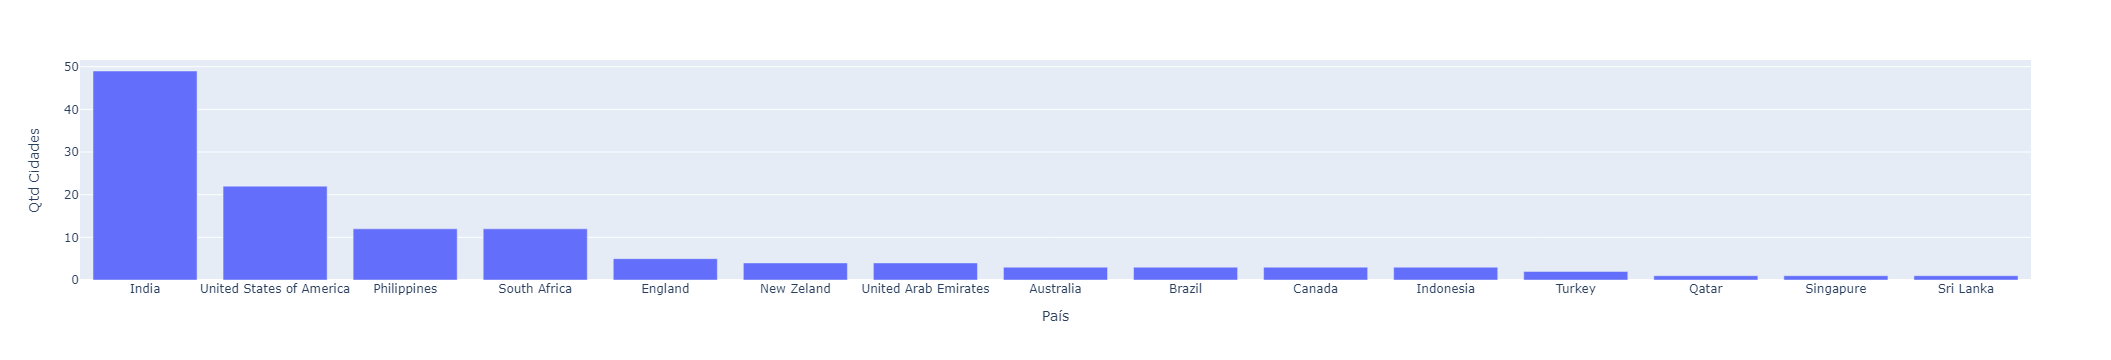

In [99]:
# Quantidade de cidades registradas por país

colunas = ['City', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).nunique().reset_index()
df1['País'] = df1['Country Code'].apply(country_name)
df1 = df1.rename(columns={'City' : 'Qtd Cidades'})
df1 = df1.drop(['Country Code'], axis = 1)
df1 = df1.sort_values('Qtd Cidades', ascending = False)
px.bar(df1, x='País', y='Qtd Cidades')

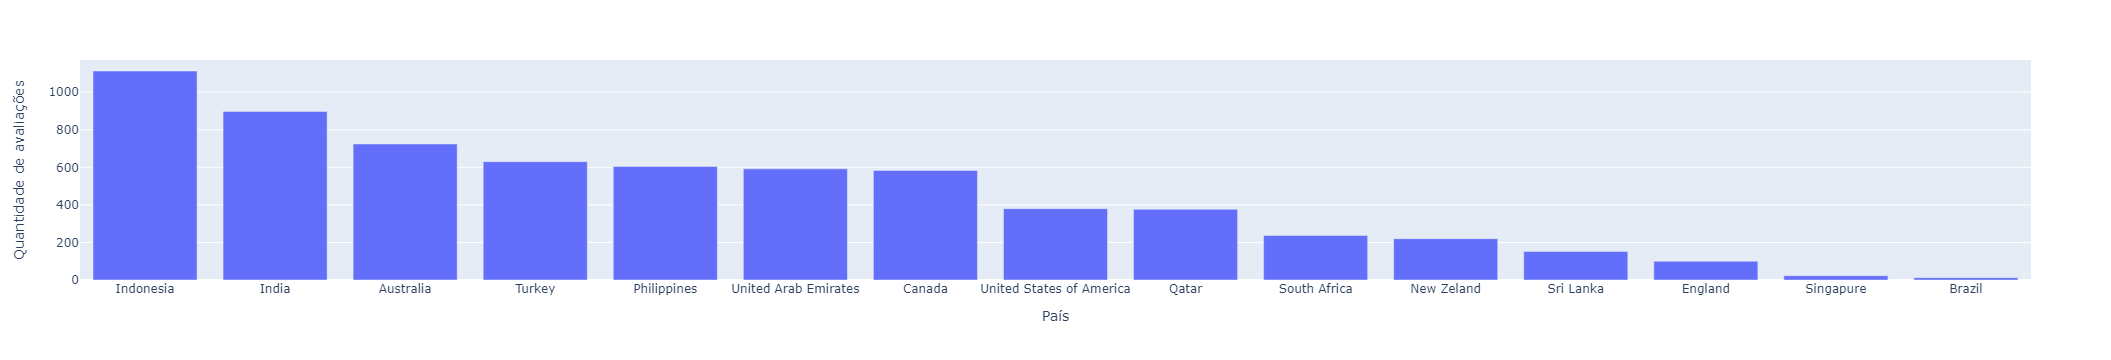

In [103]:
# Média de avaliações feitas por país

colunas = ['Votes', 'Country Code']

df1 = df.loc[:, colunas].groupby(['Country Code']).mean().reset_index()
df1['País'] = df1['Country Code'].apply(country_name)
df1 = df1.drop(['Country Code'], axis=1)
df1 = df1.sort_values('Votes', ascending = False)
df1 = df1.rename(columns={'Votes' : 'Quantidade de avaliações'})
px.bar(df1, x='País', y='Quantidade de avaliações')

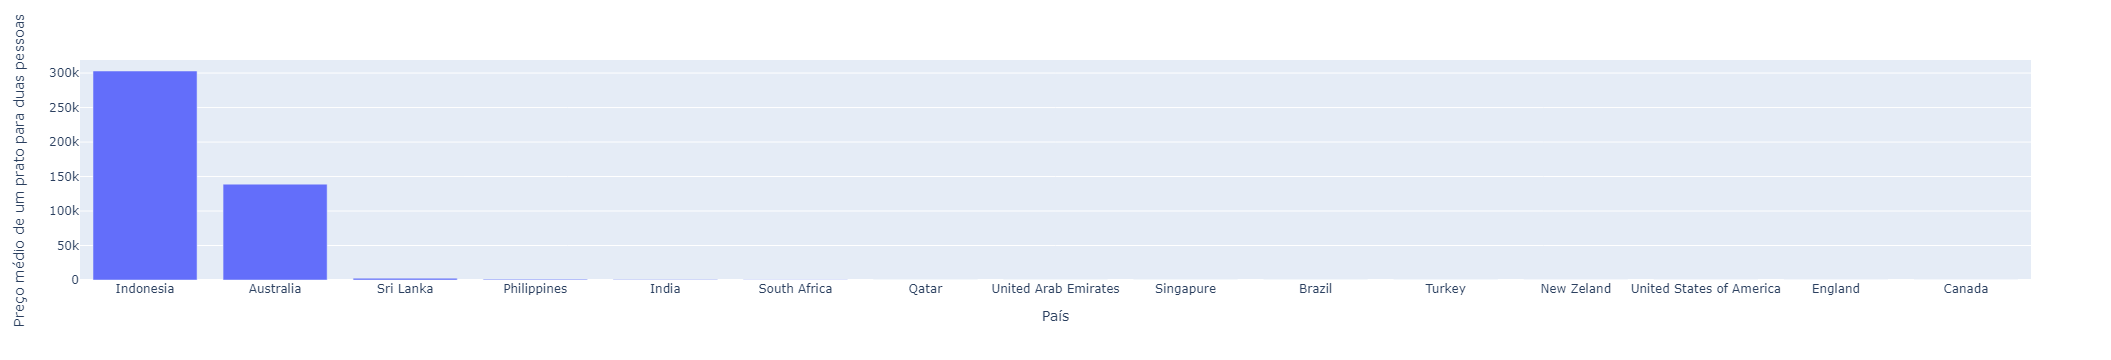

In [111]:
#Média de preço de um prato para duas pessoas por país

colunas = ['Average Cost for two', 'Country Code']

df_aux = df1.loc[:, colunas].groupby(['Country Code']).mean().reset_index()
df_aux['País'] = df_aux['Country Code'].apply(country_name)
df_aux = df_aux.drop(['Country Code'], axis = 1)
df_aux = df_aux.sort_values('Average Cost for two', ascending = False)
df_aux = df_aux.rename(columns = {'Average Cost for two' : 'Preço médio de um prato para duas pessoas'})

px.bar(df_aux, x='País', y='Preço médio de um prato para duas pessoas')

### Visão cidades

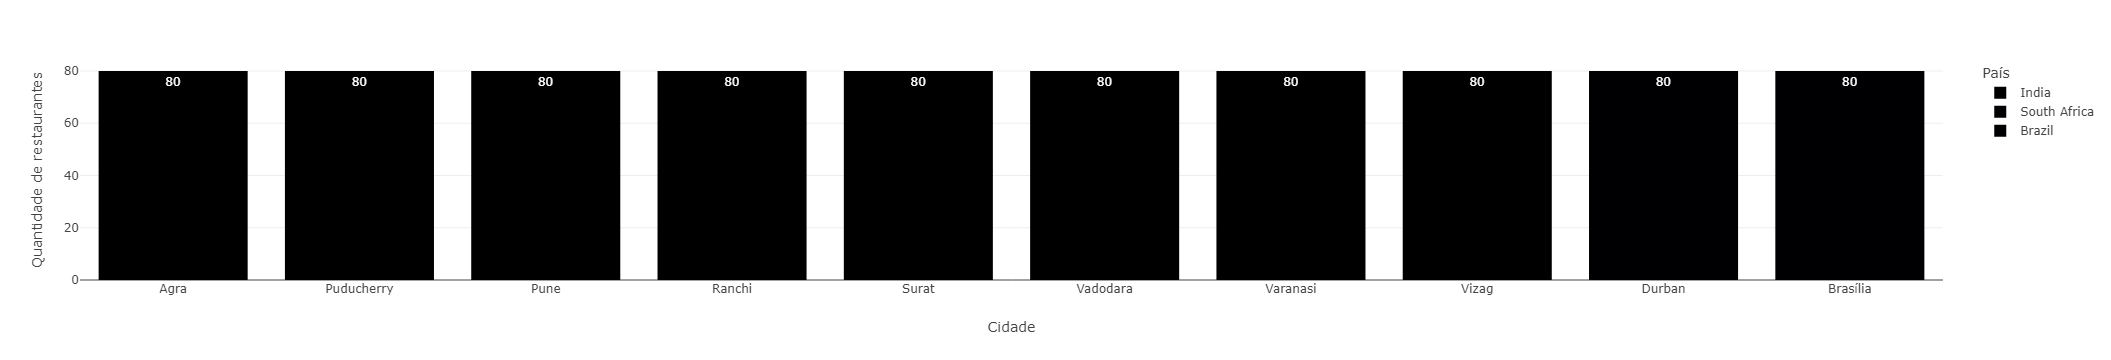

In [102]:
# Top 10 cidades com mais restaurantes na base de dados

#definindo colunas
colunas = ['Restaurant ID', 'Country Code', 'City', 'Rating color']
#agrupando
df_aux = df1.loc[:, colunas].groupby(['Country Code', 'City']).nunique().reset_index()
#aplicando funções
df_aux['País'] = df_aux['Country Code'].apply(country_name)
#df_aux['Cor'] = df_aux['Rating color'].apply(color_name)
#excluindo colunas
df_aux = df_aux.drop(['Country Code'], axis = 1)
#ordenando
df_aux = df_aux.sort_values('Restaurant ID', ascending = False).reset_index(drop=True)
#filtrando um top
df_aux = df_aux.loc[df_aux.index < 10, :].reset_index(drop=True)

#renomeando
df_aux = df_aux.rename(columns= {'City' : 'Cidade', 'Restaurant ID' : 'Quantidade de restaurantes'})

#plotando
px.bar(df_aux, x='Cidade', y='Quantidade de restaurantes', color='País', text_auto='Quantidade de restaurantes')
#df_aux

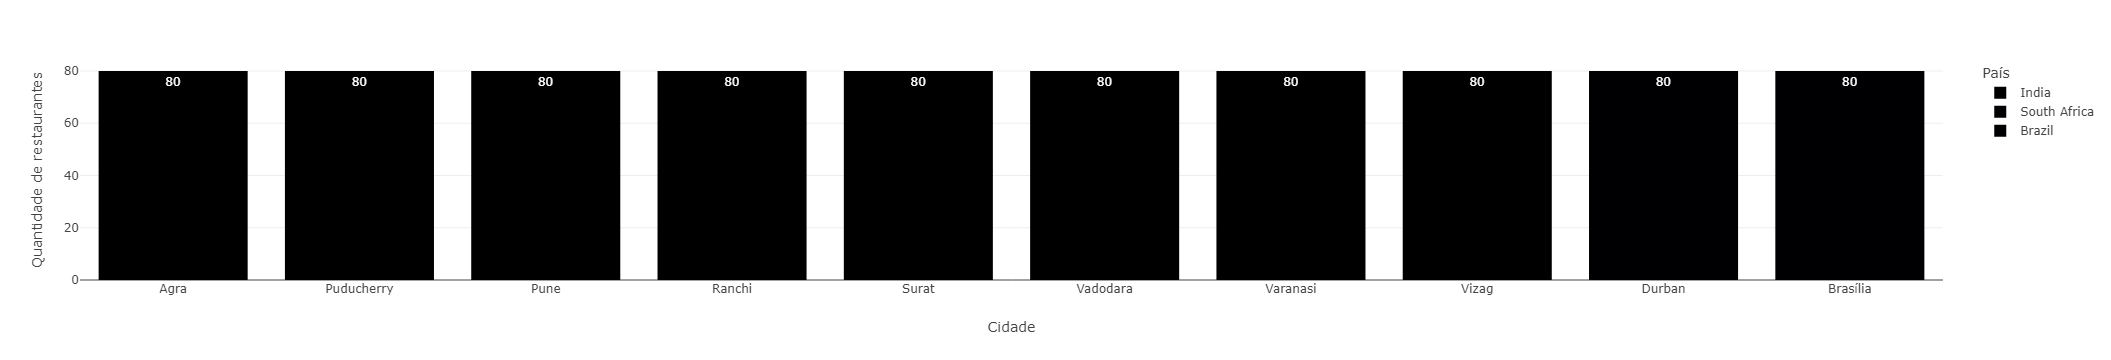

In [103]:
# Top 10 cidades com mais restaurantes na base de dados

#definindo colunas
colunas = ['Restaurant ID', 'City', 'Country Code']
#agrupando
df_aux = df1.loc[:, colunas].groupby(['Country Code', 'City']).nunique().reset_index()
#aplicando funções
df_aux['País'] = df_aux['Country Code'].apply(country_name)
#excluindo colunas
df_aux = df_aux.drop(['Country Code'], axis = 1)
#ordenando
df_aux = df_aux.sort_values('Restaurant ID', ascending = False).reset_index(drop=True)
#filtrando um top
df_aux = df_aux.loc[df_aux.index < 10, :].reset_index(drop=True)

#renomeando
df_aux = df_aux.rename(columns= {'City' : 'Cidade', 'Restaurant ID' : 'Quantidade de restaurantes'})

#plotando
px.bar(df_aux, x='Cidade', y='Quantidade de restaurantes', color='País', text_auto='Quantidade de restaurantes')
#df_aux

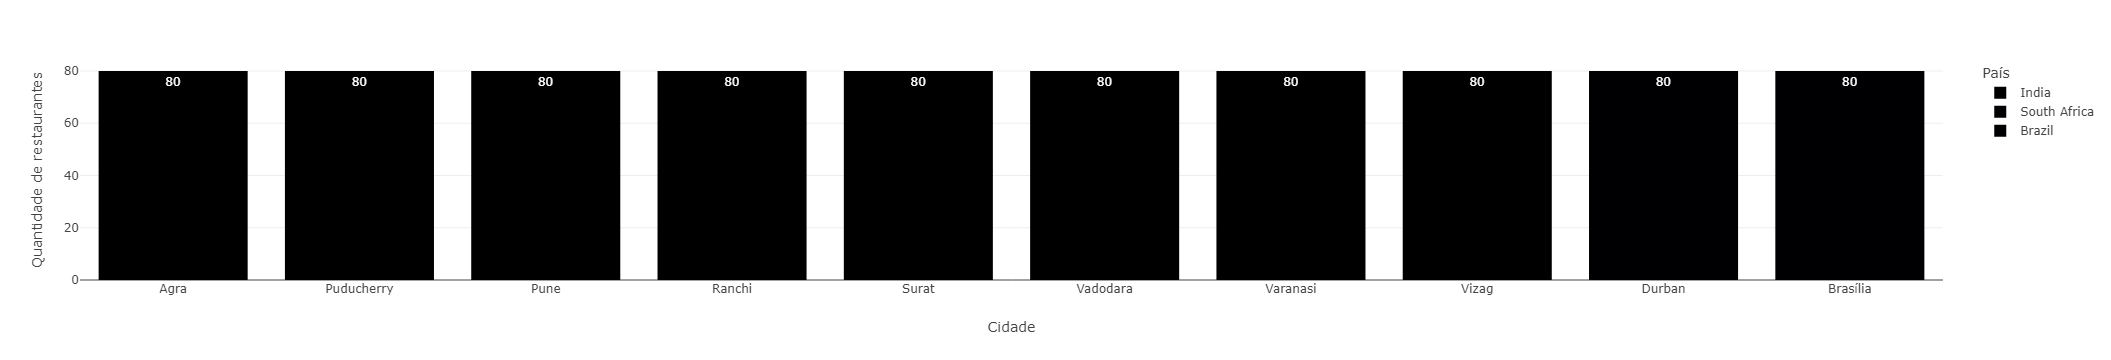

In [104]:
# Top 10 cidades com mais restaurantes na base de dados

#definindo colunas
colunas = ['Restaurant ID', 'City', 'Country Code']
#agrupando
df_aux = df1.loc[:, colunas].groupby(['Country Code', 'City']).nunique().reset_index()
#aplicando funções
df_aux['País'] = df_aux['Country Code'].apply(country_name)
#excluindo colunas
df_aux = df_aux.drop(['Country Code'], axis = 1)
#ordenando
df_aux = df_aux.sort_values('Restaurant ID', ascending = False).reset_index(drop=True)
#filtrando um top
df_aux = df_aux.loc[df_aux.index < 10, :].reset_index(drop=True)

#renomeando
df_aux = df_aux.rename(columns= {'City' : 'Cidade', 'Restaurant ID' : 'Quantidade de restaurantes'})

#plotando
px.bar(df_aux, x='Cidade', y='Quantidade de restaurantes', color='País', text_auto='Quantidade de restaurantes')
#df_aux

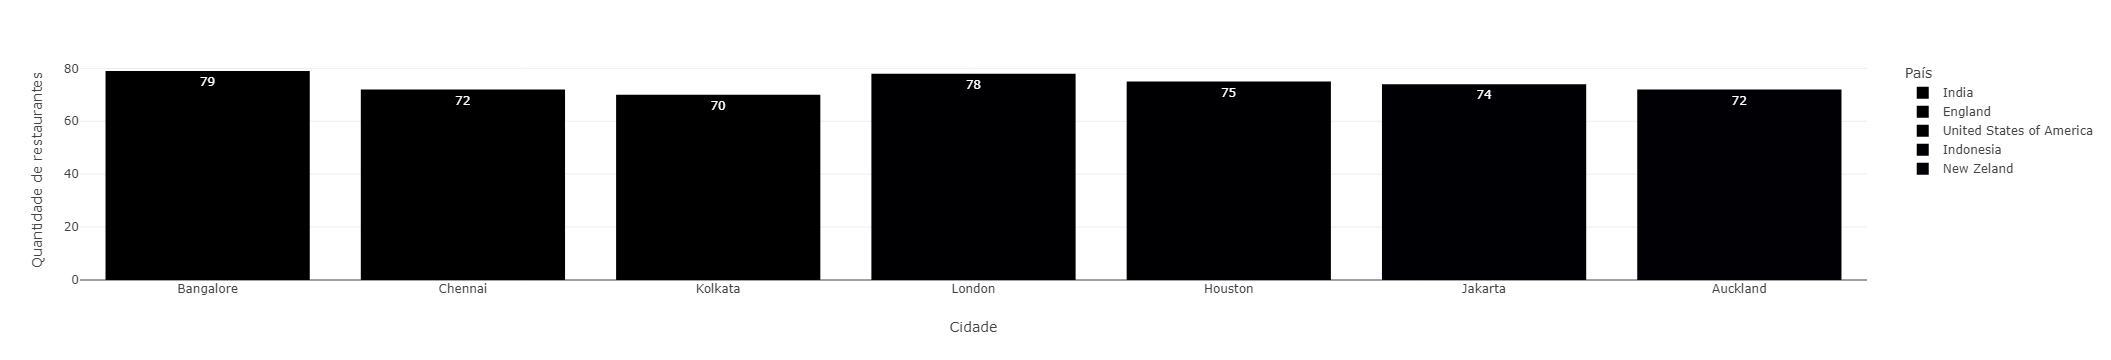

In [105]:
# Top 7 cidades com mais restaurantes com média de avaliação acima de 4

#colunas e filtros
colunas = ['Restaurant ID', 'City', 'Country Code']
filtro = (df1['Aggregate rating'] > 4) & (df1['Votes'] > 0)
#agrupando
df_aux = df1.loc[filtro, colunas].groupby(['Country Code', 'City']).nunique().reset_index()
#aplicando filtros
df_aux['País'] = df_aux['Country Code'].apply(country_name)
#ordenando
df_aux = df_aux.sort_values('Restaurant ID', ascending = False).reset_index(drop=True)
#filtrando um top
df_aux = df_aux.loc[df_aux.index < 7, :].reset_index(drop=True)
#renomeando
df_aux = df_aux.rename(columns = { 'City' : 'Cidade', 'Restaurant ID' : 'Quantidade de restaurantes'})

px.bar(df_aux, x='Cidade', y='Quantidade de restaurantes', color='País', text='Quantidade de restaurantes')

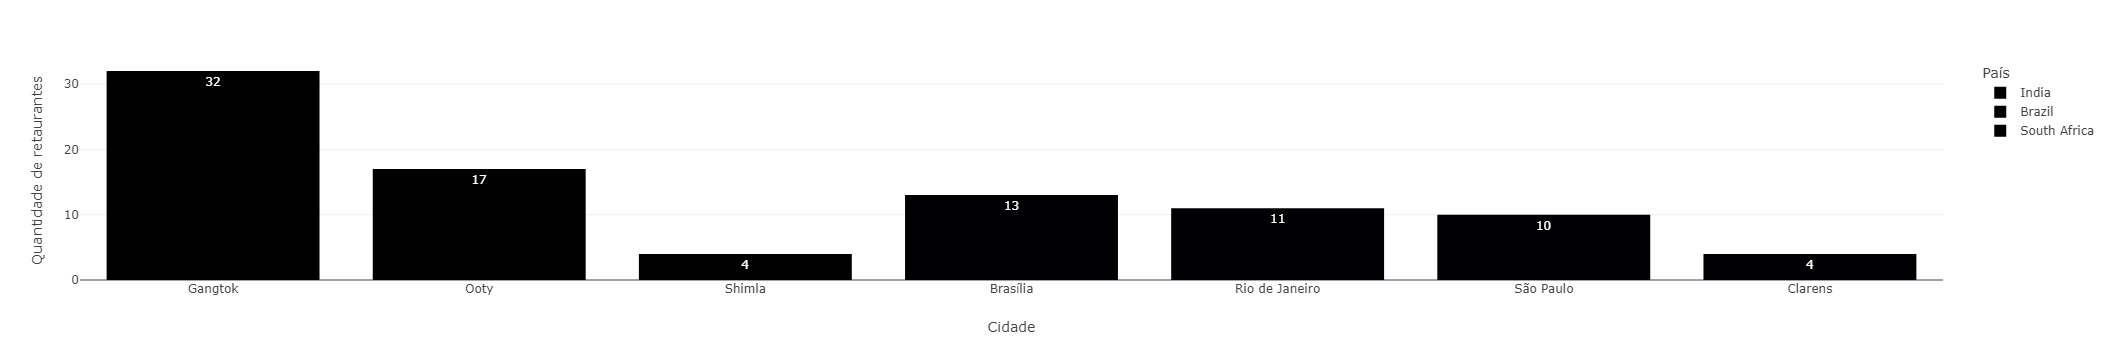

In [107]:
# Top 7 cidades com mais restaurantes com média de avaliação abaixo de 2.5

#colunas e filtros
colunas = ['Restaurant ID', 'City', 'Country Code']
filtro = (df1['Aggregate rating'] < 2.5) & (df1['Votes'] > 0)
#agrupando
df_aux = df1.loc[filtro, colunas].groupby(['Country Code', 'City']).nunique().reset_index()
#aplicando funções
df_aux['País'] = df_aux['Country Code'].apply(country_name)
#ordenando
df_aux = df_aux.sort_values('Restaurant ID', ascending = False).reset_index(drop=True)
#criando um top
df_aux = df_aux.loc[df_aux.index < 7, :].reset_index(drop=True)
#excluíndo colunas desnecessárias
df_aux = df_aux.drop(['Country Code'], axis = 1)

#renomeando
df_aux = df_aux.rename( columns = { 'City' : 'Cidade', 'Restaurant ID' : 'Quantidade de retaurantes'})
#plotando
px.bar(df_aux, x='Cidade', y='Quantidade de retaurantes', color='País', text='Quantidade de retaurantes')

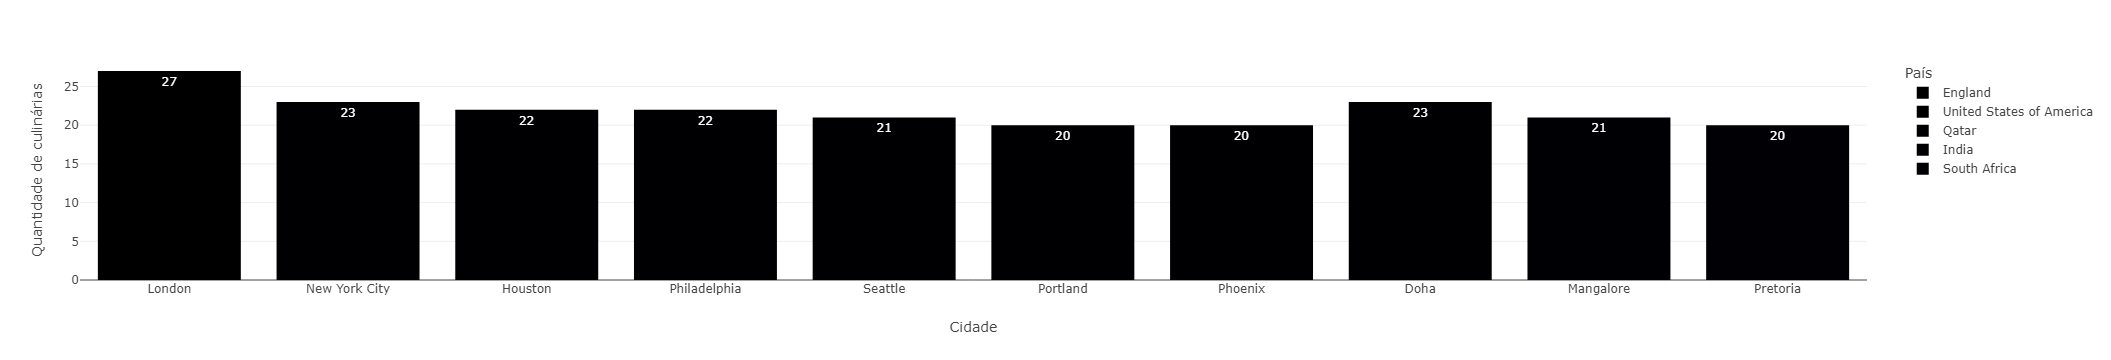

In [108]:
# Top 10 cidades com mais restaurantes com tipo de culinárias distintos

#Definindo colunas
colunas = ['Cuisines', 'City', 'Country Code', 'Rating color']
#agrupando a quantidade distinta de culinárias por cidade
df_aux = df1.loc[:, colunas].groupby(['Country Code','City',  'Rating color']).nunique().reset_index()
#aplicando funções: nomeando países e nomeando cores
df_aux['País'] = df_aux['Country Code'].apply(country_name)
df_aux['Cor'] = df_aux['Rating color'].apply(color_name)
#ordenando o dataframe em ordem decrescente
df_aux = df_aux.sort_values('Cuisines', ascending = False).reset_index(drop=True)
#filtrando as 10 primeiras linhas do dataframe
df_aux = df_aux.loc[0:9, :]
#excluído colunas desnecessárias
df_aux = df_aux.drop(['Rating color', 'Country Code'], axis = 1)
#renomeando colunas
df_aux = df_aux.rename(columns = {'City' : 'Cidade', 'Cuisines' : 'Quantidade de culinárias'})
#criando e exibindo o gráfico
px.bar(df_aux, x='Cidade', y='Quantidade de culinárias', color='País' ,text_auto='Quantidade de culinárias')



### Visão culinárias

In [27]:
""" Top 1 restaurante com o principal tipo de culinária


Passo 1: SAída: O que você vai entregar como solução? Se você pudesse materializar a solução e entregar para a pessoa, o que seria? Consegue descrever com suas palavras?

- Será entregue uma dataframe com o nome do país, nome do restaurante, cidade, preço médio para um prato para duas pessoas, avaliação do restaurante, nome da culinária Top 1 restaurante com o principal tipo de culinária

Passo 2: Processo: Se você não soubesse escrever comandos em Python e tivesse somente lápis, papel, calculadora na mão, como você resolveria o problema? Qual a sequência de passos lógicos você seguiria?

- Obter os 5 tipos de culinária com a maior média de avaliação
- Obter os top 1 melhores restaurantes e suas informações, de cada uma das 5 culinárias
- 
-indicar a posição no array para pegar o tipo de culinária que deve ser filtrado
-
-

#Passo 3: Entrada: Elaboração do código

"""
def avaliation_restaurant(df1, rank_asc, indice):
    '''
    Esta função tem o objetivo de trazer as informações do melhor ou pior restaurante do top 5 melhores ou piores restaurantes
    df: dataframe a ser analisado
    rank_asc: a ordenação da análise
        - False: irá analisar os melhores restaurantes
        - True: irá analisar os piores restaurantes
    indice: indica qual dos top 5 restaurantes você deseja exibir
        - exemplo: o top restaurantes vai de 1 a 5, porém, como temos o indice iniciando em 0, precisamos 
        utilizar os valores de 0 a 4 para indicar esses restaurantes, sendo 0 o primeiro restaurante e 4 o último restaurante.
    '''
    # Obter os 5 tipos de culinária com a maior média de avaliação
    # Filtros e colunas
    colunas = ['Aggregate rating', 'Cuisines']
    filtros = (df1['Votes'] > 0) & (df1['Cuisines'] != 'Others') & (df1['Cuisines'] != 'nan')

    df_aux = df1.loc[filtros, colunas].groupby(['Cuisines']).mean().reset_index()
    df_aux = df_aux.sort_values('Aggregate rating', ascending = rank_asc).reset_index(drop=True)
    df_aux = df_aux.loc[:4, ['Cuisines']]
    culinarias = list(df_aux['Cuisines'])

    #Filtrando somente as restaurantes que servem as top 5 culinárias
    df_aux = df1.loc[(df1['Cuisines'].isin(culinarias)), :]

    #Filtrando apenas o restaurante com a maior média, da culinária top 1
    filtros = (df_aux['Cuisines'] == culinarias[indice])
    colunas = ['Country Code', 'City', 'Average Cost for two', 'Currency', 'Restaurant Name', 'Aggregate rating', 'Cuisines']
    df_aux = df_aux.loc[filtros, colunas]
    df_aux = df_aux.sort_values('Aggregate rating', ascending = rank_asc).reset_index(drop=True)
    df_aux = df_aux.loc[:0, :]
    df_aux['País'] = df_aux['Country Code'].apply(country_name)
    df_aux = df_aux.rename( columns = {'Average Cost for two' : 'Média de um prato para dois', 'Currency' : 'Moeda', 'Restaurant Name' : 'Restaurante', 'City' : 'Cidade', 'Cuisines' : 'Culinária', 'Aggregate rating' : 'Avaliação'})
    df_aux = df_aux.drop(['Country Code'], axis=1)
    return df_aux

In [29]:
#Top melhores e piores restaurantes

def rank_restaurant(df1, rank_asc, indice):
    '''
        Esta função tem o objetivo de trazer as informações de um rank de 1 a 20 piores ou melhores restaurantes
        df: dataframe a ser analisado
        rank_asc: a ordenação da análise
            - False: irá analisar os melhores restaurantes
            - True: irá analisar os piores restaurantes
        indice: indica qual o top restaurantes você deseja exibir
            - exemplo: a partir de um filtro de valores é definido um número, de 1 a 20, onde deve ser escolhido a quantidade de restaurantes que deve conter este rank
    '''
    
    filtros = (df1['Votes'] > 0) & (df1['Cuisines'] != 'Others') & (df1['Cuisines'] != 'nan')
    colunas = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'Votes']

    df_aux = df1.loc[filtros, colunas].reset_index(drop=True)
    df_aux = df_aux.sort_values('Aggregate rating', ascending = rank_asc).reset_index(drop=True)
    df_aux = df_aux.loc[:filtro, :]
    return df_aux



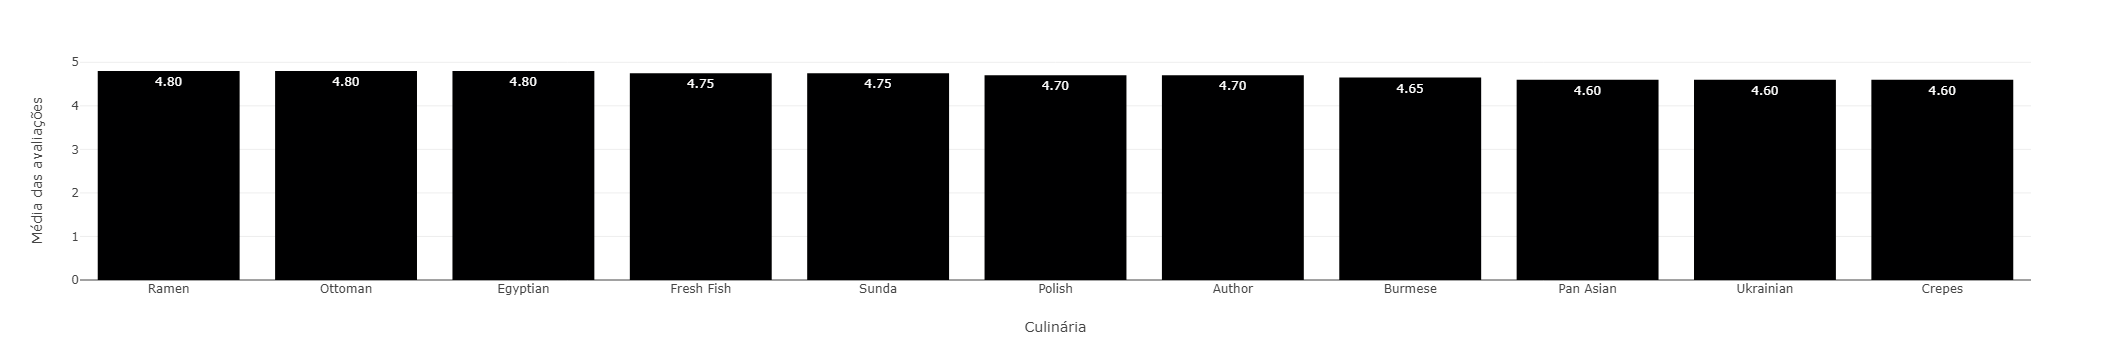

In [39]:
# Obter o top 1 a top 20 tipos de culinária com a maior ou menor média de avaliação
# Filtros e colunas


def avaliation_cuisines(df1, rank_asc, indice):
    '''
        Esta função tem o objetivo de trazer um gráfico de barras de um rank de 1 a 20 piores ou melhores culinárias
        df: dataframe a ser analisado
        rank_asc: a ordenação da análise
            - False: irá analisar os melhores restaurantes
            - True: irá analisar os piores restaurantes
        indice: indica qual o top restaurantes você deseja exibir
            - exemplo: a partir de um filtro de valores é definido um número, de 1 a 20, onde deve ser escolhido a quantidade de restaurantes que deve conter este rank
    '''
    colunas = ['Aggregate rating', 'Cuisines']
    filtros = (df1['Votes'] > 0) & (df1['Cuisines'] != 'Others')
    df_aux = df1.loc[filtros, colunas].groupby(['Cuisines']).mean().reset_index()
    df_aux = df_aux.sort_values('Aggregate rating', ascending = rank_asc).reset_index(drop=True)
    df_aux = df_aux.rename(columns = {'Cuisines' : 'Culinária', 'Aggregate rating' : 'Média das avaliações'})
    df_aux = df_aux.loc[:indice, :]

    graph = px.bar(df_aux, x='Culinária', y='Média das avaliações', text_auto='.2f')
    return graph

graph = avaliation_cuisines(df1, rank_asc = False, indice = 10)
px.bar(graph, x='Culinária', y='Média das avaliações', text_auto='.2f')